## Author: Sridharan Chandran

# PROJECT: ENSEMBLE TECHNIQUE

## PART - A 

 **DOMAIN:** Telecom
 
 **• CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
 
**• DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

**• PROJECT OBJECTIVE:** To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

## STEPS AND TASK

### 1. Data Understanding & Exploration:

#### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 

In [1]:
# Import necessary library packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [2]:
# Read the dataset1
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


#### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
# Read the dataset2
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame.

In [4]:
# Merge the datasets.
df=pd.merge(df1,df2,on="customerID")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [5]:
# Print the datasets shapes.
print("Dataframe-1 shape:",df1.shape)
print("Dataframe-2 shape:",df2.shape)
print("Merged Dataframe shape:",df.shape)

Dataframe-1 shape: (7043, 10)
Dataframe-2 shape: (7043, 12)
Merged Dataframe shape: (7043, 21)


Merged dataframe shape is equal to Dataframe 1 & 2 Colums & rows which is meged on "CostomerID".

In [6]:
print("Dataframe-1 columns are: \n",df1.columns)
print("\n Dataframe-2 columns are: \n",df2.columns)
print("\n Merged Dataframe columns are: \n",df.columns)

Dataframe-1 columns are: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

 Dataframe-2 columns are: 
 Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 Merged Dataframe columns are: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
# Save the datasets 1 & 2 column names into list.
List1 = df1.columns.values.tolist()
List2 = df2.columns.values.tolist()

# merge the datasets columns into set
Combined_columns1 = set(List1+List2)

# Save the merged dataset column names into set
List4 = df.columns.values.tolist()
Combined_columns2 = set(List4)

# Compare the both sets are equal or not.
Combined_columns1 == Combined_columns2

True

*Merged dataframe columns are equal to Dataframes 1 & 2 Columns.*

### 2. Data Cleaning & Analysis:

#### A. Impute missing/unexpected values in the DataFrame.

In [8]:
df.isna().any() # check the null values in the dataframe.

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe().T # Check the 5 point summery.

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# Counting the value counts in the features.
print("1. gender counts are:\n",df["gender"].value_counts(),"\n")
print("2. SeniorCitizen counts are:\n",df["SeniorCitizen"].value_counts(),"\n")
print("3. Partner counts are:\n",df["Partner"].value_counts(),"\n")
print("4. Dependents counts are:\n",df["Dependents"].value_counts(),"\n")
print("5. tenure counts are:\n",df["tenure"].value_counts(),"\n")
print("6. PhoneService counts are:\n",df["PhoneService"].value_counts(),"\n")
print("7. MultipleLines counts are:\n",df["MultipleLines"].value_counts(),"\n")
print("8. InternetService counts are:\n",df["InternetService"].value_counts(),"\n")
print("9. OnlineSecurity counts are:\n",df["OnlineSecurity"].value_counts(),"\n")
print("10. OnlineBackup counts are:\n",df["OnlineBackup"].value_counts(),"\n")
print("11. DeviceProtection counts are:\n",df["DeviceProtection"].value_counts(),"\n")
print("12. TechSupport counts are:\n",df["TechSupport"].value_counts(),"\n")
print("13. StreamingTV counts are:\n",df["StreamingTV"].value_counts(),"\n")
print("14. StreamingMovies counts are:\n",df["StreamingMovies"].value_counts(),"\n")
print("15. Contract counts are:\n",df["Contract"].value_counts(),"\n")
print("16. PaperlessBilling counts are:\n",df["PaperlessBilling"].value_counts(),"\n")
print("17. PaymentMethod counts are:\n",df["PaymentMethod"].value_counts(),"\n")
print("18. MonthlyCharges counts are:\n",df["MonthlyCharges"].value_counts(),"\n")
print("19. TotalCharges counts are:\n",df["TotalCharges"].value_counts(),"\n")
print("20. Churn counts are:\n",df["Churn"].value_counts(),"\n")

1. gender counts are:
 Male      3555
Female    3488
Name: gender, dtype: int64 

2. SeniorCitizen counts are:
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

3. Partner counts are:
 No     3641
Yes    3402
Name: Partner, dtype: int64 

4. Dependents counts are:
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

5. tenure counts are:
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

6. PhoneService counts are:
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

7. MultipleLines counts are:
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

8. InternetService counts are:
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

9. OnlineSecurity counts are:
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, 

#### B. Make sure all the variables with continuous values are of ‘Float’ type.

In [12]:
# Convet the data types 
df["gender"] = df["gender"].astype("category")
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")
df["Partner"] = df["Partner"].astype("category")
df["Dependents"] = df["Dependents"].astype("category")
df["tenure"] = df["tenure"].astype("float")
df["PhoneService"] = df["PhoneService"].astype("category")
df["MultipleLines"] = df["MultipleLines"].astype("category")
df["InternetService"] = df["InternetService"].astype("category")
df["OnlineSecurity"] = df["OnlineSecurity"].astype("category")
df["OnlineBackup"] = df["OnlineBackup"].astype("category")
df["DeviceProtection"] = df["DeviceProtection"].astype("category")
df["TechSupport"] = df["TechSupport"].astype("category")
df["StreamingTV"] = df["StreamingTV"].astype("category")
df["StreamingMovies"] = df["StreamingMovies"].astype("category")
df["Contract"] = df["Contract"].astype("category")
df["PaperlessBilling"] = df["PaperlessBilling"].astype("category")
df["PaymentMethod"] = df["PaymentMethod"].astype("category")
df["MonthlyCharges"] = df["MonthlyCharges"].astype("float")
df["Churn"] = df["Churn"].astype("category")

When we convert the "TotalCharges" feature datatype from object to float, we can found that some value are object type " " (Space). Hence we have to impute them to do analysis.

In [13]:
df["TotalCharges"] = np.where(df["TotalCharges"] ==" ",np.nan,df["TotalCharges"])

In [14]:
Median_value = df["TotalCharges"].median()
Median_value

1397.475

In [15]:
df["TotalCharges"].isna().value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

In [16]:
df["TotalCharges"].fillna(value=Median_value,inplace=True)

In [17]:
df["TotalCharges"].isna().value_counts()

False    7043
Name: TotalCharges, dtype: int64

In [18]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [20]:
print("Tenure feature data type:",df.tenure.dtype)
print("MonthlyCharges feature data type:",df.MonthlyCharges.dtype)
print("TotalCharges feature data type:",df.TotalCharges.dtype)

Tenure feature data type: float64
MonthlyCharges feature data type: float64
TotalCharges feature data type: float64


The dataframe features "Tenure", "MonthlyCharges" &  "TotalCharges" are converted to "float" datatype.

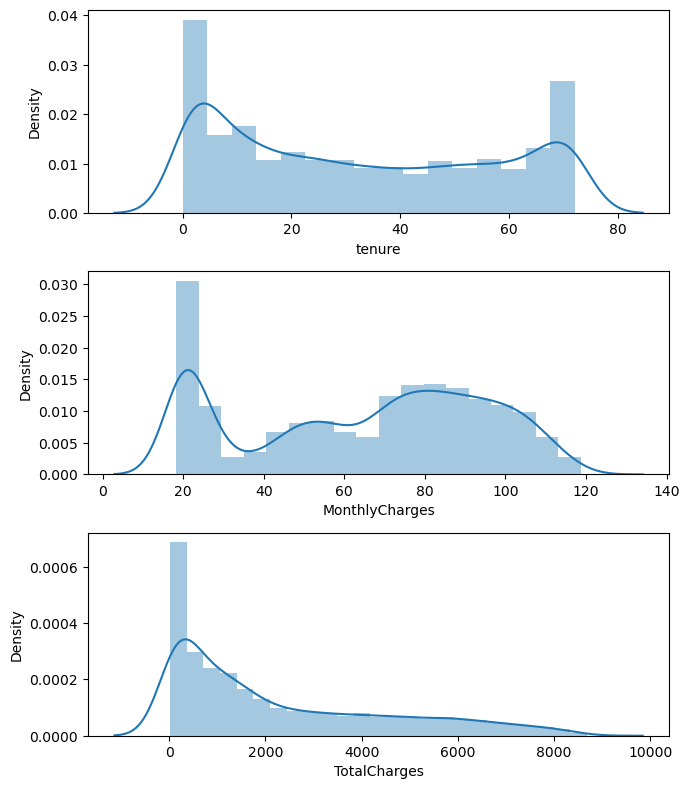

In [21]:
#Univariate Analysis

continuousNumerical=['tenure','MonthlyCharges','TotalCharges']

#histograms for numerical data
fig, ax = plt.subplots(len(continuousNumerical),figsize=(7,8))
index=np.arange(len(continuousNumerical))
for column,i in zip(continuousNumerical,index):
    sns.distplot(df[column],ax=ax[i]);

fig.tight_layout()
plt.show()

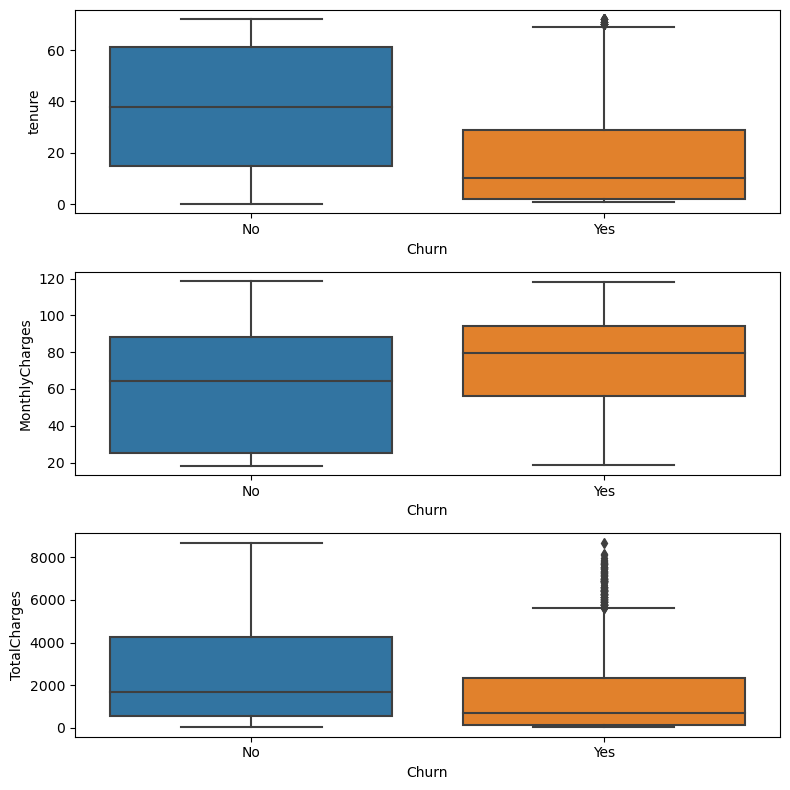

In [22]:
#Univariate Analysis Box Plot
fig, ax = plt.subplots(len(continuousNumerical),figsize=(8,8))
index=np.arange(len(continuousNumerical))
for column,i in zip(continuousNumerical,index):
    sns.boxplot(y=df[column],x=df['Churn'],ax=ax[i]);

fig.tight_layout()
plt.show()  

As per the boxplot we can see some outliers in "tenure" & "TotalCharges" features. Hence we have to check & treat the outliers.

In [23]:
# Treating outliers in the "tenure" feature.
Tenure_min = df["tenure"].min()
Tenure_Q1 = df["tenure"].quantile(0.25)
Tenure_median = df["tenure"].quantile(0.5)
Tenure_Q3 = df["tenure"].quantile(0.75)
Tenure_max = df["tenure"].max()
Tenure_IQR = Tenure_Q3 - Tenure_Q1
Tenure_HigherBound = Tenure_Q3 + (1.5*Tenure_IQR)

print("Tenure Min value:",Tenure_min)
print("Tenure Quartile-1:",Tenure_Q1)
print("Tenure Median:",Tenure_median)
print("Tenure Quartile-3:",Tenure_Q3)
print("Tenure Max value:",Tenure_max)
print("Tenure_HigherBound:",Tenure_HigherBound)

Tenure Min value: 0.0
Tenure Quartile-1: 9.0
Tenure Median: 29.0
Tenure Quartile-3: 55.0
Tenure Max value: 72.0
Tenure_HigherBound: 124.0


In Tenure feature the max value is less than HigherBound value.Hence tenure feature has not outliers.

In [24]:
# Treating outliers in the "TotalCharges" feature.
TotalCharges_min = df["TotalCharges"].min()
TotalCharges_Q1 = df["TotalCharges"].quantile(0.25)
TotalCharges_median = df["TotalCharges"].quantile(0.5)
TotalCharges_Q3 = df["TotalCharges"].quantile(0.75)
TotalCharges_max = df["TotalCharges"].max()
TotalCharges_IQR = TotalCharges_Q3 - TotalCharges_Q1
TotalCharges_HigherBound = TotalCharges_Q3 + (1.5*TotalCharges_IQR)

print("TotalCharges Min value:",TotalCharges_min)
print("TotalCharges Quartile-1:",TotalCharges_Q1)
print("TotalCharges Median:",TotalCharges_median)
print("TotalCharges Quartile-3:",TotalCharges_Q3)
print("TotalCharges Max value:",TotalCharges_max)
print("TotalCharges HigherBound:",TotalCharges_HigherBound)

TotalCharges Min value: 18.8
TotalCharges Quartile-1: 402.225
TotalCharges Median: 1397.475
TotalCharges Quartile-3: 3786.6
TotalCharges Max value: 8684.8
TotalCharges HigherBound: 8863.1625


In TotalCharges feature the max value is less than HigherBound value. Hence TotalCharges feature has not outliers.

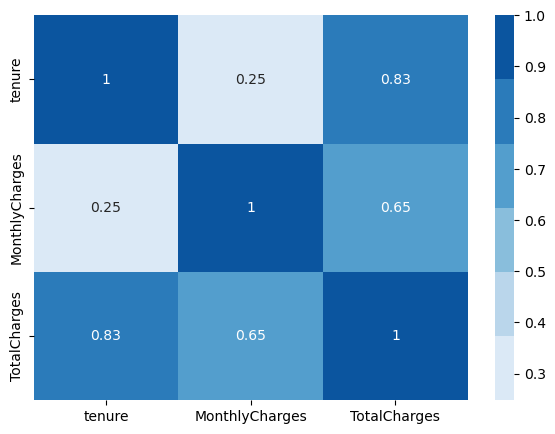

In [25]:
# Relationship between different numerical features and outcome variables
colormap = sns.color_palette("Blues")
corr=df.corr()
plt.figure(figsize= (7,5))
sns.heatmap(corr,cmap=colormap,annot=True,);

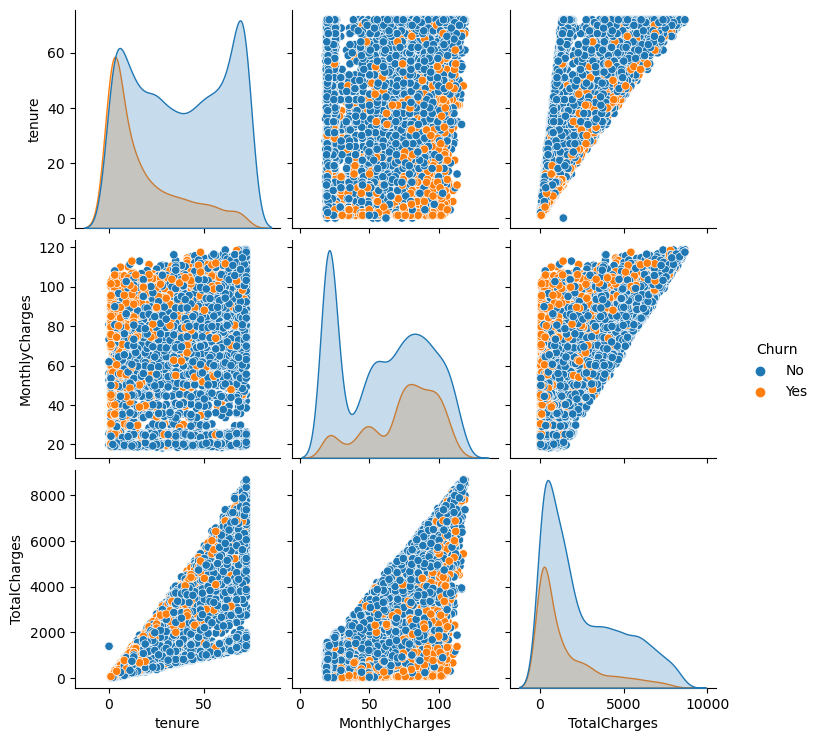

In [26]:
# Visuvalize the numarical features with Pairplot.
sns.pairplot(df,diag_kind = 'kde',x_vars=['tenure','MonthlyCharges','TotalCharges'],
             y_vars=['tenure','MonthlyCharges','TotalCharges'],hue='Churn');

#### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [27]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df,m):
    '''Takes in a dataframe(df) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(25, 20))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

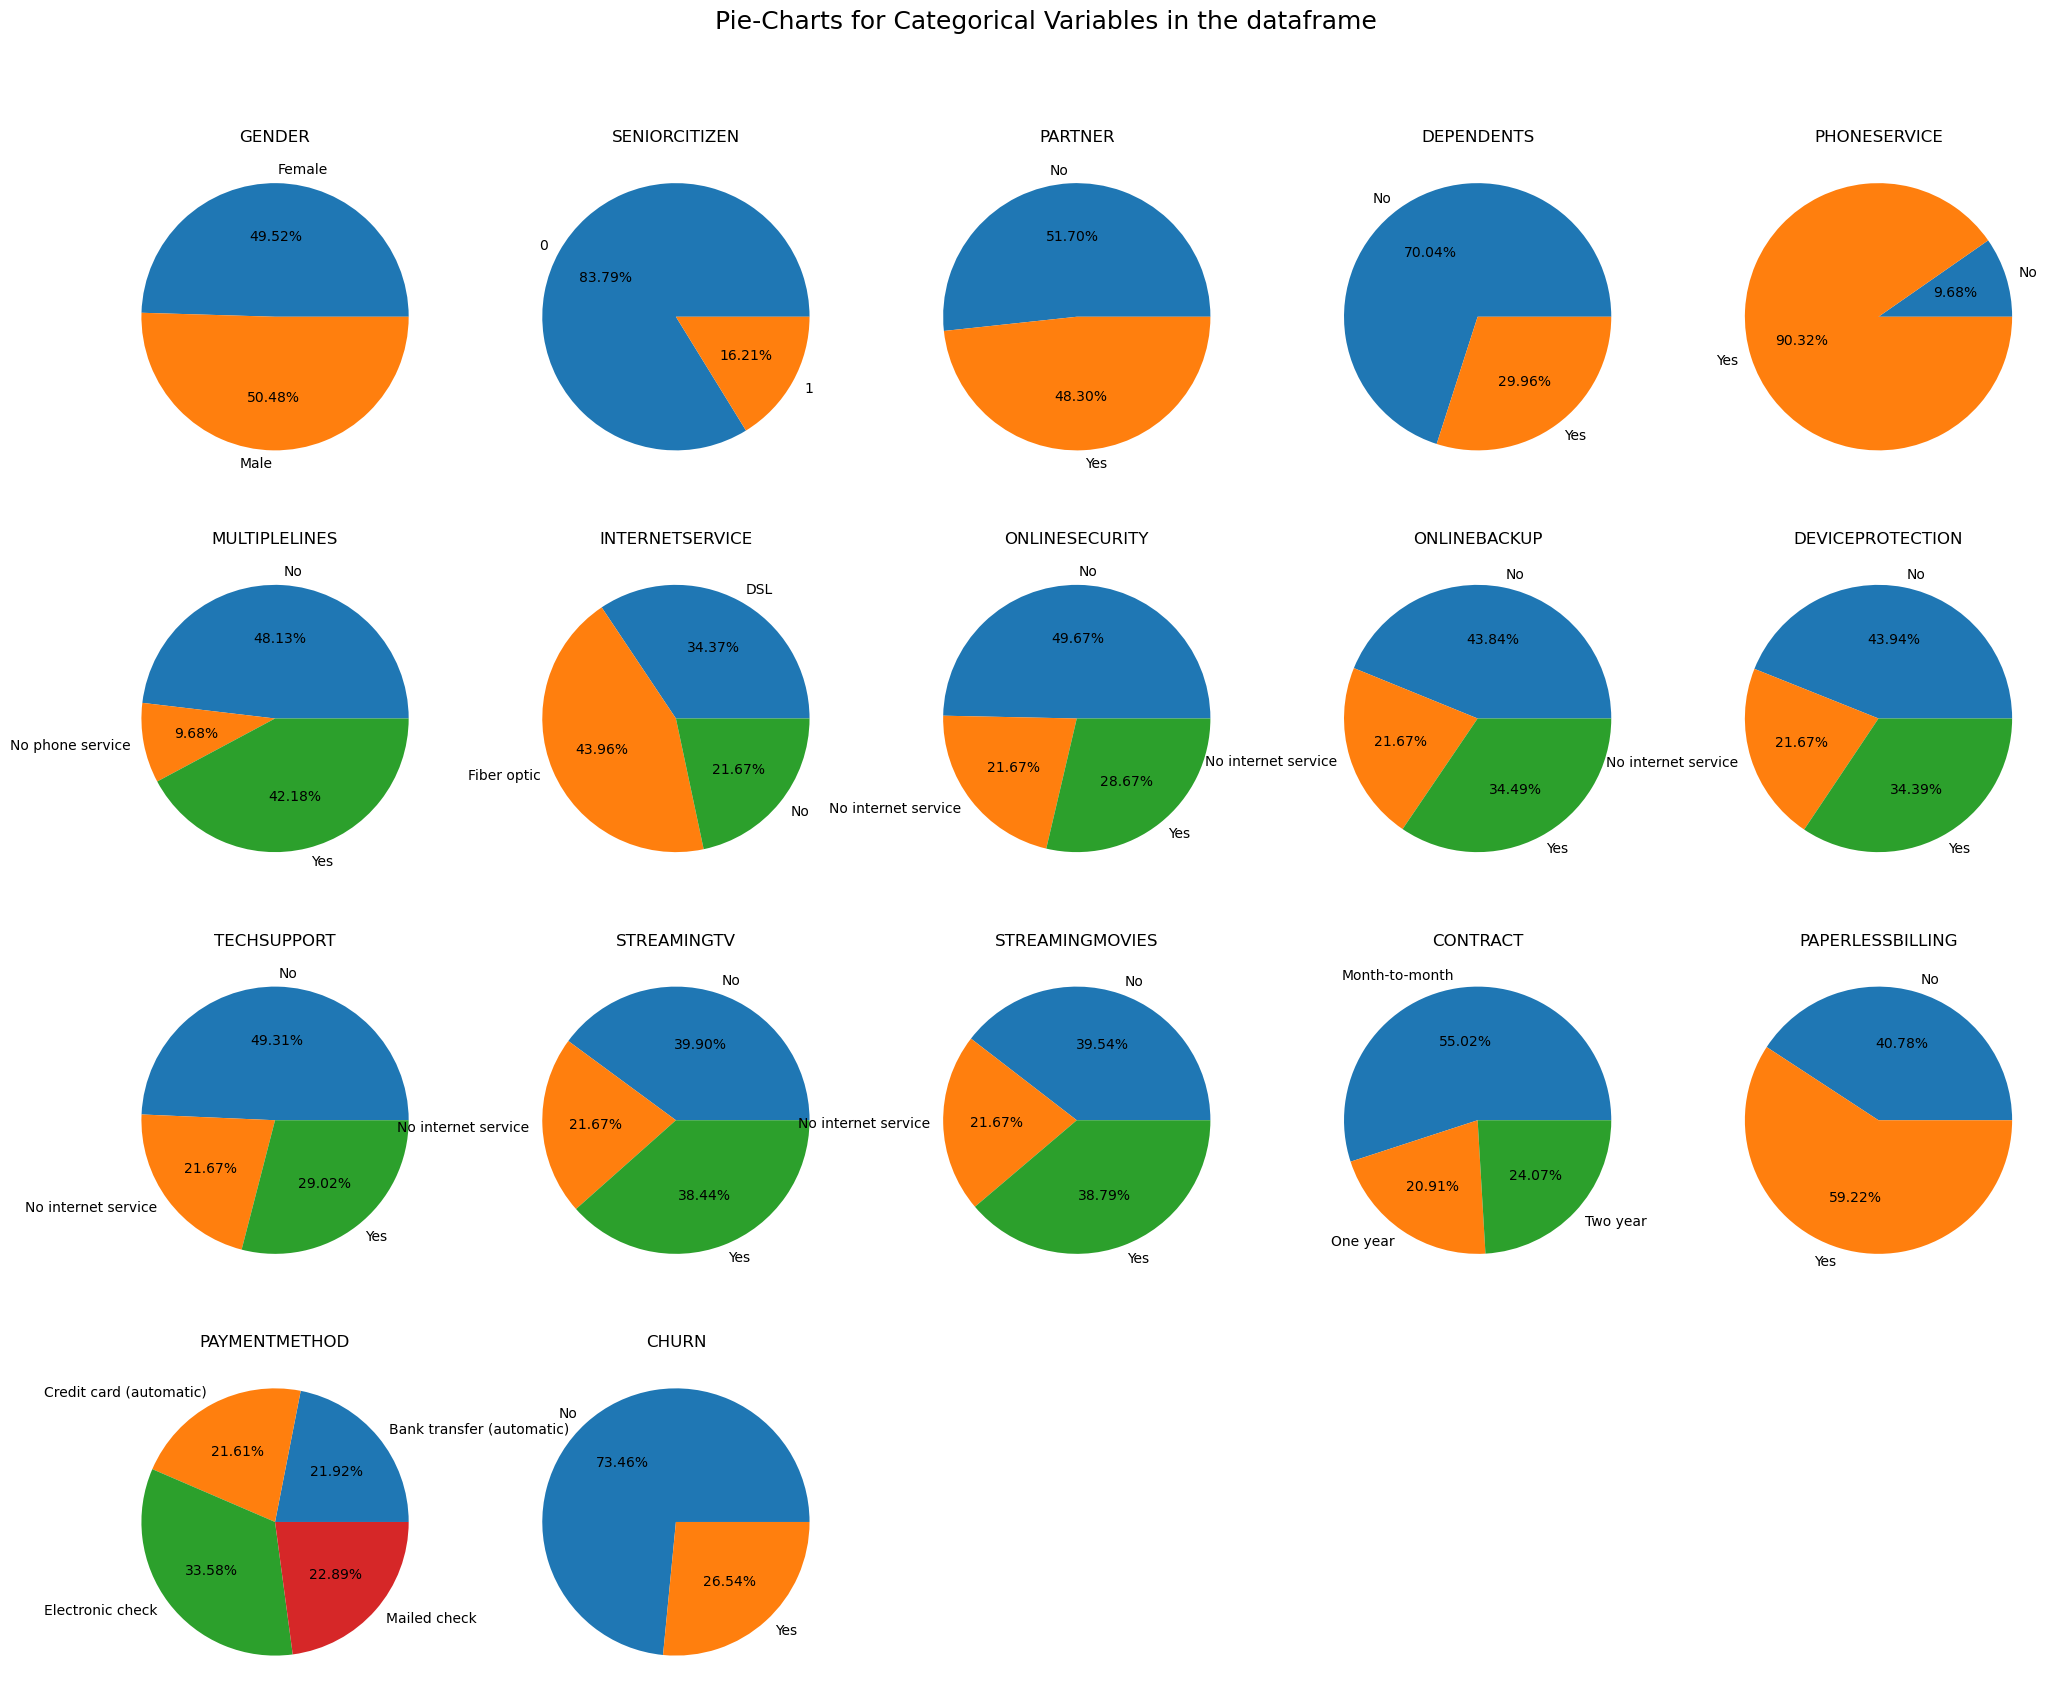

In [28]:
pie_charts_for_CategoricalVar(df,5)

#### D. Share insights for Q2.c

  -  The above plot shows that there are 50.48% male & 49.52% female. 
  -  16.21% of the people are Seniorcitizen & 83.79% of people are not a senior citizen.
  -  48.30% of the people have partner & 51.70% of people don't have.
  -  29.96% of the people have dependents & 70.04% of people don't have.
  -  90.32% of the people have phone service & 9.68% of people don't have. In that 90.32% people 42.18% are have multilple line & 48.13% don't have.
  -  34.37% of the people are using DSL for internet, 43.96% are using Fiber optic type & 21.67% of the people have no internet service.
  - 28.67% of the people have online security, 49.67% are don't have & 21.67% of the people have no internet service.
  - 34.49% of the people have online backup & device protection, 43.84% are don't have & 21.67% of the people have no internet service.
  - 29.02% of the people have Tech support, 49.31% are don't have & 21.67% of the people have no internet service.
  - 38.44% of the people have StreamingTV, 39.90% are don't have & 21.67% of the people have no internet service.
  - 38.79% of the people have Streaming Movies, 39.54% are don't have & 21.67% of the people have no internet service.
  - 55.02% of the people have Month-to-month contract, 20.91% of people have 1 year contract & 24.07% of the people have 2 year contract.
  - 59.22% of the people are using paperless billing & 40.78% of people don't.
  - 21.61% of the people using Credit card to payment, 33.58% are using Electronic check, 21.92% are using bank transfer & 22.89% of the people are using Mailed check.
  - 26.54% of the people are churned the connection & 73.46% of the people are not. 

In [29]:
# Make deep copy of the dataframe of the original data.

df_new = df.copy(deep=True) 

# Drop unnecessary columns which is not useful to do analysis.

df_new.drop("customerID",axis=1, inplace=True) 

df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df_new["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**This is seems a imbalanced dataset. We have to resample the dataset for better prediction.**

In [31]:
DataX = df_new[(df_new.Churn=="No")]
DataX.shape

(5174, 20)

In [32]:
DataY = df_new[(df_new.Churn=="Yes")]
DataY.shape

(1869, 20)

In [33]:
# To balance the data we have to do upsampling the DataY.

from sklearn.utils import resample

DataY1 = resample(DataY,replace=True,n_samples=len(DataX),random_state=42)

print(DataY1.shape)

(5174, 20)


In [34]:
# Concatnating the datasets.
df1 = [DataX,DataY1]
df_new = pd.concat(df1,ignore_index = True)

In [35]:
df_new.shape

(10348, 20)

#### E. Encode all the appropriate Categorical features with the best suitable approach.

In [36]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

df_new1 = df_new.apply(labelencoder.fit_transform) # returns label encoded variable(s)

df_new1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,72,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,497,3543,0
2,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,265,3490,0
3,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1072,3592,0
4,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,140,1108,0


#### F. Split the data into 80% train and 20% test

In [37]:
# Split the datset as independent features & dependent feature.

X = df_new1.iloc[:,:-1]
Y = df_new1.iloc[:,-1]

In [38]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,72
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,497,3543
2,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,265,3490
3,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1072,3592
4,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,140,1108


In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

#### G. Normalize/Standardize the data with the best suitable approach.

In [40]:
# convert the features into StandardScaler as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

XScaled = pd.DataFrame(StandardScaler().fit_transform(X))
XScaled.columns = X.columns
XScaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.017352,-0.488861,1.119153,-0.591040,-1.107236,-3.072780,0.032029,-1.258996,-0.782490,1.322409,-0.910280,-0.784377,-1.051340,-1.053563,-0.667170,0.746185,0.357360,-1.266309,-1.412263
1,0.982944,-0.488861,-0.893533,-0.591040,0.260692,0.325438,-1.020133,-1.258996,1.574775,-0.914317,1.328745,-0.784377,-1.051340,-1.053563,0.630307,-1.340150,1.339816,-0.494684,0.398244
2,0.982944,-0.488861,-0.893533,-0.591040,0.716668,-3.072780,0.032029,-1.258996,1.574775,-0.914317,1.328745,1.570347,-1.051340,-1.053563,0.630307,-1.340150,-1.607552,-0.998957,0.370599
3,0.982944,-0.488861,-0.893533,1.691932,-0.236737,0.325438,1.084190,0.216272,-0.782490,1.322409,-0.910280,-0.784377,1.142503,-1.053563,-0.667170,0.746185,-0.625096,0.755131,0.423803
4,-1.017352,-0.488861,-0.893533,-0.591040,-0.734165,-3.072780,0.032029,-1.258996,1.574775,-0.914317,-0.910280,-0.784377,-1.051340,-1.053563,-0.667170,-1.340150,1.339816,-1.270656,-0.871876


In [41]:
from sklearn.model_selection import train_test_split #Import the library

X_train, X_test, y_train, y_test = train_test_split(XScaled,Y,test_size=0.20, random_state=1)

print(X_train.shape)
print(X_test.shape)

(8278, 19)
(2070, 19)


### 3. Model building and Improvement:

#### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [42]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [43]:
# Import the necessary metrics packages.

from xgboost import XGBClassifier

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [44]:
# Initiate XGBoost Classifier
model1 = XGBClassifier()

# Print default setting
model1.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
model1.fit(X_train,y_train) # Fit the train datas into XGBoost model.

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
# Predict the test data.
y_pred1 = model1.predict(X_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 0])

In [47]:
print("Model train score is :",model1.score(X_train,y_train))
print("Model test score is :",model1.score(X_test,y_test))

Model train score is : 0.9445518241121044
Model test score is : 0.8714975845410629


In [48]:
 y_pred1.shape

(2070,)

In [49]:
print ('Accuracy Score is',accuracy_score(y_pred1, y_test))
print ('Recall Score is',recall_score(y_test, y_pred1))
print ('Precision Score is',precision_score(y_test, y_pred1))

Accuracy Score is 0.8714975845410629
Recall Score is 0.940254652301665
Precision Score is 0.8240343347639485


In [50]:
print ('Classification Report : ')
print (classification_report(y_pred1, y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       905
           1       0.94      0.82      0.88      1165

    accuracy                           0.87      2070
   macro avg       0.87      0.88      0.87      2070
weighted avg       0.88      0.87      0.87      2070



In [51]:
cm=metrics.confusion_matrix(y_test, y_pred1)
cm

array([[844, 205],
       [ 61, 960]], dtype=int64)

Confusion Matrix for Model-1


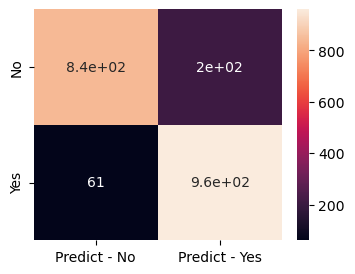

In [52]:
print("Confusion Matrix for Model-1")
cm=metrics.confusion_matrix(y_test, y_pred1)

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                  columns = [i for i in ["Predict - No","Predict - Yes"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True);

In [53]:
# import necessary libraries.
 
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [54]:
# Finding the set of optimal hyperparameter with Randomizedsearchcv method.

clf_xgb = XGBClassifier(objective = 'binary:logistic')
params = {
 "learning rate" : stats.uniform(0.07, 0.12),
 "n_estimators": stats.randint(20,70),
 "max_depth": [6, 10, 15, 20],
"subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
"colsample_bytree": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
"colsample_bylevel": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
"min_child_weight": [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
"gamma": [0, 0.25, 0.5, 1.0],
"reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_clf = RandomizedSearchCV(clf_xgb, params, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")
rs_clf.fit(X_train, y_train)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
"\n"
print("\n Best params:\n ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))


Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0, learning rate=0.09201217478393967, max_depth=15, min_child_weight=7.0, n_estimators=40, reg_lambda=1.0, subsample=0.7; total time=   0.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0, learning rate=0.09201217478393967, max_depth=15, min_child_weight=7.0, n_estimators=40, reg_lambda=1.0, subsample=0.7; total time=   0.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.5, learning rate=0.17394113749299223, max_depth=6, min_child_weight=3.0, n_estimators=41, reg_lambda=50.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.5, learning rate=0.17394113749299223, max_depth=6, min_child_weight=3.0, n_estimators=41, reg_lambda=50.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, gamma=0.25, learning rate=0.07009345190092173, max_depth=

In [55]:
# Initiate XGBoost Classifier with best parameters
model2 = XGBClassifier(colsample_bylevel= 1.0,
                       colsample_bytree= 0.7,
                       gamma= 0,
                       learning_rate= 0.092,
                       max_depth= 15,
                       min_child_weight= 7.0,
                       n_estimators= 40,
                       reg_lambda= 0.1,
                       subsample= 0.7)


In [56]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.092, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=7.0, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
print("Model train score is :",model2.score(X_train,y_train))
print("Model test score is :",model2.score(X_test,y_test))

Model train score is : 0.8748489973423532
Model test score is : 0.8342995169082126


In [58]:
y_pred2 = model2.predict(X_test)
y_pred2

array([1, 0, 0, ..., 0, 1, 0])

In [59]:
print ('Accuracy Score is',accuracy_score(y_pred2, y_test))
print ('Recall Score is',recall_score(y_test, y_pred2))
print ('Precision Score is',precision_score(y_test, y_pred2))

Accuracy Score is 0.8342995169082126
Recall Score is 0.8883447600391773
Precision Score is 0.7984154929577465


In [60]:
print ('Classification Report : ')
print (classification_report(y_pred2, y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       934
           1       0.89      0.80      0.84      1136

    accuracy                           0.83      2070
   macro avg       0.84      0.84      0.83      2070
weighted avg       0.84      0.83      0.83      2070



In [61]:
cm=metrics.confusion_matrix(y_test, y_pred2)
cm

array([[820, 229],
       [114, 907]], dtype=int64)

Confusion Matrixfor Model-2


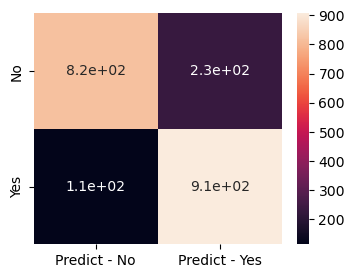

In [62]:
print("Confusion Matrixfor Model-2")
cm=metrics.confusion_matrix(y_test, y_pred2)

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                  columns = [i for i in ["Predict - No","Predict - Yes"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True);

#### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Building the new model 
clf_xgb2 = XGBClassifier(objective= 'binary:logistic', nthread=4,seed=42)

params = {"learning_rate":[0.05, 0.07, 0.1],
          "n_estimators": range(60, 220, 40),
          "max_depth": range(6, 10,1)}

clf2 = GridSearchCV(clf_xgb2, params, n_jobs=5,
                    scoring='roc_auc',
                    verbose=2, refit=True)

clf2.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan

In [65]:
best_score2 = clf2.best_score_
best_score2

0.9347347330026814

In [66]:
best_params2 = clf2.best_params_
"\n"
print("\n Best params:\n ")
for param_name in sorted(best_params2.keys()):
    print('%s: %r' % (param_name, best_params2[param_name]))


 Best params:
 
learning_rate: 0.1
max_depth: 9
n_estimators: 180


In [67]:
# Initiate XGBoost Classifier with best parameters
model3 = XGBClassifier(learning_rate= 0.1,
                       max_depth= 9,
                       n_estimators= 180)

In [68]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [69]:
print("Model train score is :",model3.score(X_train,y_train))
print("Model test score is :",model3.score(X_test,y_test))

Model train score is : 0.9710074897318193
Model test score is : 0.893719806763285


In [70]:
y_pred3 = model3.predict(X_test)
y_pred3

array([1, 0, 0, ..., 0, 1, 0])

In [71]:
print ('Accuracy Score is',accuracy_score(y_pred3, y_test))
print ('Recall Score is',recall_score(y_test, y_pred3))
print ('Precision Score is',precision_score(y_test, y_pred3))

Accuracy Score is 0.893719806763285
Recall Score is 0.9578844270323212
Precision Score is 0.8467532467532467


In [72]:
print ('Classification Report : ')
print (classification_report(y_pred3, y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       915
           1       0.96      0.85      0.90      1155

    accuracy                           0.89      2070
   macro avg       0.89      0.90      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [73]:
cm=metrics.confusion_matrix(y_test, y_pred3)
cm

array([[872, 177],
       [ 43, 978]], dtype=int64)

Confusion Matrix for Model-3


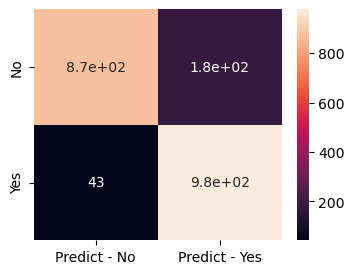

In [74]:
print("Confusion Matrix for Model-3")
cm=metrics.confusion_matrix(y_test, y_pred3)

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                  columns = [i for i in ["Predict - No","Predict - Yes"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True);

**We improved 3% perfomance on model Accuracy & F1-score from the base model using Gridsearchcv Hyperparameter tuning method.**

## PART - B

 **• DOMAIN:** IT
 
**• CONTEXT:** The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

**• PROJECT OBJECTIVE:** Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

### STEPS AND TASK

#### 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).

#### 2. Create separate functions for various purposes.

#### 3. Various base models should be trained to select the best performing model.

#### 4. Pickle file should be saved for the best performing model.

In [75]:
# Function to preprocesss the data
def preprocess_data(path_to_csv,target_feature):
    df = pd.read_csv(path_to_csv)
    
    # Impute missing values
    missing_values = df.isna().sum()
    missing_list = ((missing_values>0).index).tolist()
    for i in missing_list:
        if df[i].dtypes in ['int64','int32','float64','float32']:
            df[i].fillna(df[i].mean(),inplace=True)
        else: 
            df[i].fillna(mode(df[i])[0][0],inplace=True)
            
    # Impute duplicate values
    df.drop_duplicates(inplace=True)
    
    #Impute unnecessary features
    for col in df.columns:
        unique_percentage = (df[col].value_counts().count()/df.shape[0])*100
        if unique_percentage > 95:
            df.drop(col,inplace=True,axis=1)
        else:
            pass       
    
    return df,target_feature

In [76]:
# Function to try various models and get performances of all the models
def train_model(preprocessed_df, target_feature):

    # Initialize variables
    le = LabelEncoder()
    model_lst = []
    train_acc_lst = []
    test_acc_lst = []
    test_precision_lst = []
    test_recall_lst = []
        
    # Encode the variables with 'Object' type
    for col in preprocessed_df.columns:
        if preprocessed_df[col].dtype == 'O':
            preprocessed_df[col] = le.fit_transform(preprocessed_df[col])
        else:
            pass
    
    # Split into X & y
    X = preprocessed_df.drop(target_feature,axis=1)
    y = preprocessed_df[target_feature]
    
    # Split into train and test
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
    
    # Intialize models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    ada = AdaBoostClassifier()
    model_list = [lr, dt, ada, xgb]
    
    # Interate through models, train and measure performance
    for idx,i in enumerate(model_list):
        i.fit(x_train,y_train)
        train_pred= i.predict(x_train)
        test_pred = i.predict(x_test)

        train_acc = accuracy_score(y_train,train_pred)
        test_acc = accuracy_score(y_test,test_pred)
        test_precision = precision_score(y_test,test_pred,average='weighted')
        test_recall = recall_score(y_test,test_pred,average='weighted')

        # Update model performance into a DataFrame
        model_lst.append(i)
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        test_precision_lst.append(test_precision)
        test_recall_lst.append(test_recall)
        col_names = ['Model','Train_accuracy','Test_acc','Test_precision','Test_recall']
        model_performance = pd.DataFrame(list(zip(model_lst,train_acc_lst,test_acc_lst,test_precision_lst,test_recall_lst)),columns=col_names)
        
    return model_performance,x_train,y_train

In [77]:
# Function to pickle the model with best weights
def pickle_model(model_performance,x_train,y_train,file_name):
    best_model = model_performance[model_performance['Train_accuracy']==max(model_performance['Train_accuracy'])]['Model'].iloc[0]
    best_model.fit(x_train,y_train)
    with open(file_name, 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [78]:
# Main function to call the pipeline
def main_fn(path_to_csv,target_feature):
    preprocessed_df,target_feature = preprocess_data(path_to_csv,target_feature)
    model_df,x_train,y_train = train_model(preprocessed_df, target_feature)
    pickle_model(model_df,x_train,y_train,'model.pkl')
    return model_df
    

In [79]:
perform_df = main_fn("TelcomCustomer-Churn_1.csv",'OnlineSecurity')

In [80]:
perform_df

,Model,Train_accuracy,Test_acc,Test_precision,Test_recall
0,LogisticRegression(),0.780440,0.775018,0.768617,0.775018
1,DecisionTreeClassifier(),0.890131,0.728886,0.722438,0.728886
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.783103,0.782825,0.777116,0.782825
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.851083,0.751597,0.744722,0.751597


### Conlcusion

1.DecisionTreeClassifier (Tuned) was the best performing model in all the models in context of accuracy, Recall & Precision score. Since data was little imbalanced which has been upsampled to negate imbalance effect. 


2.We have performed the preprocessing techniques of null values imputation with mean & mode. Drop the duplicate values & drop the unnecessary features are reduce the dimensionality of the dataframe. 


3.We have built the various models and evaluates their performance & then we have saved the models into pickle for future use.